Baseball case study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts
the number of wins for a given team in the 2015 season based on several different indicators of success.
There are 16 different features that will be used as the inputs to the machine learning and the output will 
be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, 
                Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

Output: Number of predicted wins (W)

General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features, 
a linear regression approach is neccessary. 

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1-Data Exploration

In [2]:
#lets import the baseball data and print them
baseball=pd.read_csv('baseball.csv')
print(baseball.shape)

print(baseball)

(30, 17)
      W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121 

In [3]:
#describing the data
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# 2-Exploratory Data Analysis (Cleaning, Data Exploring & Visualizing)

In [4]:
#lets see is there any missing data or not
baseball.notnull().sum()

#so here there are no missing data

W      30
R      30
AB     30
H      30
2B     30
3B     30
HR     30
BB     30
SO     30
SB     30
RA     30
ER     30
ERA    30
CG     30
SHO    30
SV     30
E      30
dtype: int64

In [5]:
#lets check the corelation between the data
baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [6]:
# Checking the skewness of the dataset
baseball.skew()

# so here there are few variable where the skewness is more than 0.55, so we have to treat them.
# the variables are R, H, CG, SHO, SV, and E

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [7]:
# treating the skewness using log
import numpy as np
for col in baseball.columns:
    if baseball.skew().loc[col]>0.55:
        baseball[col]=np.log1p(baseball[col])

In [8]:
# Again checking the skewness of the dataset
baseball.skew()

#stll there are some skewness, so we can ignore them

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

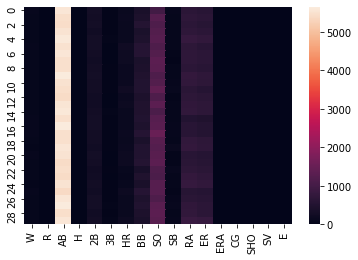

In [9]:
# checking the heatmap
sns.heatmap(baseball)

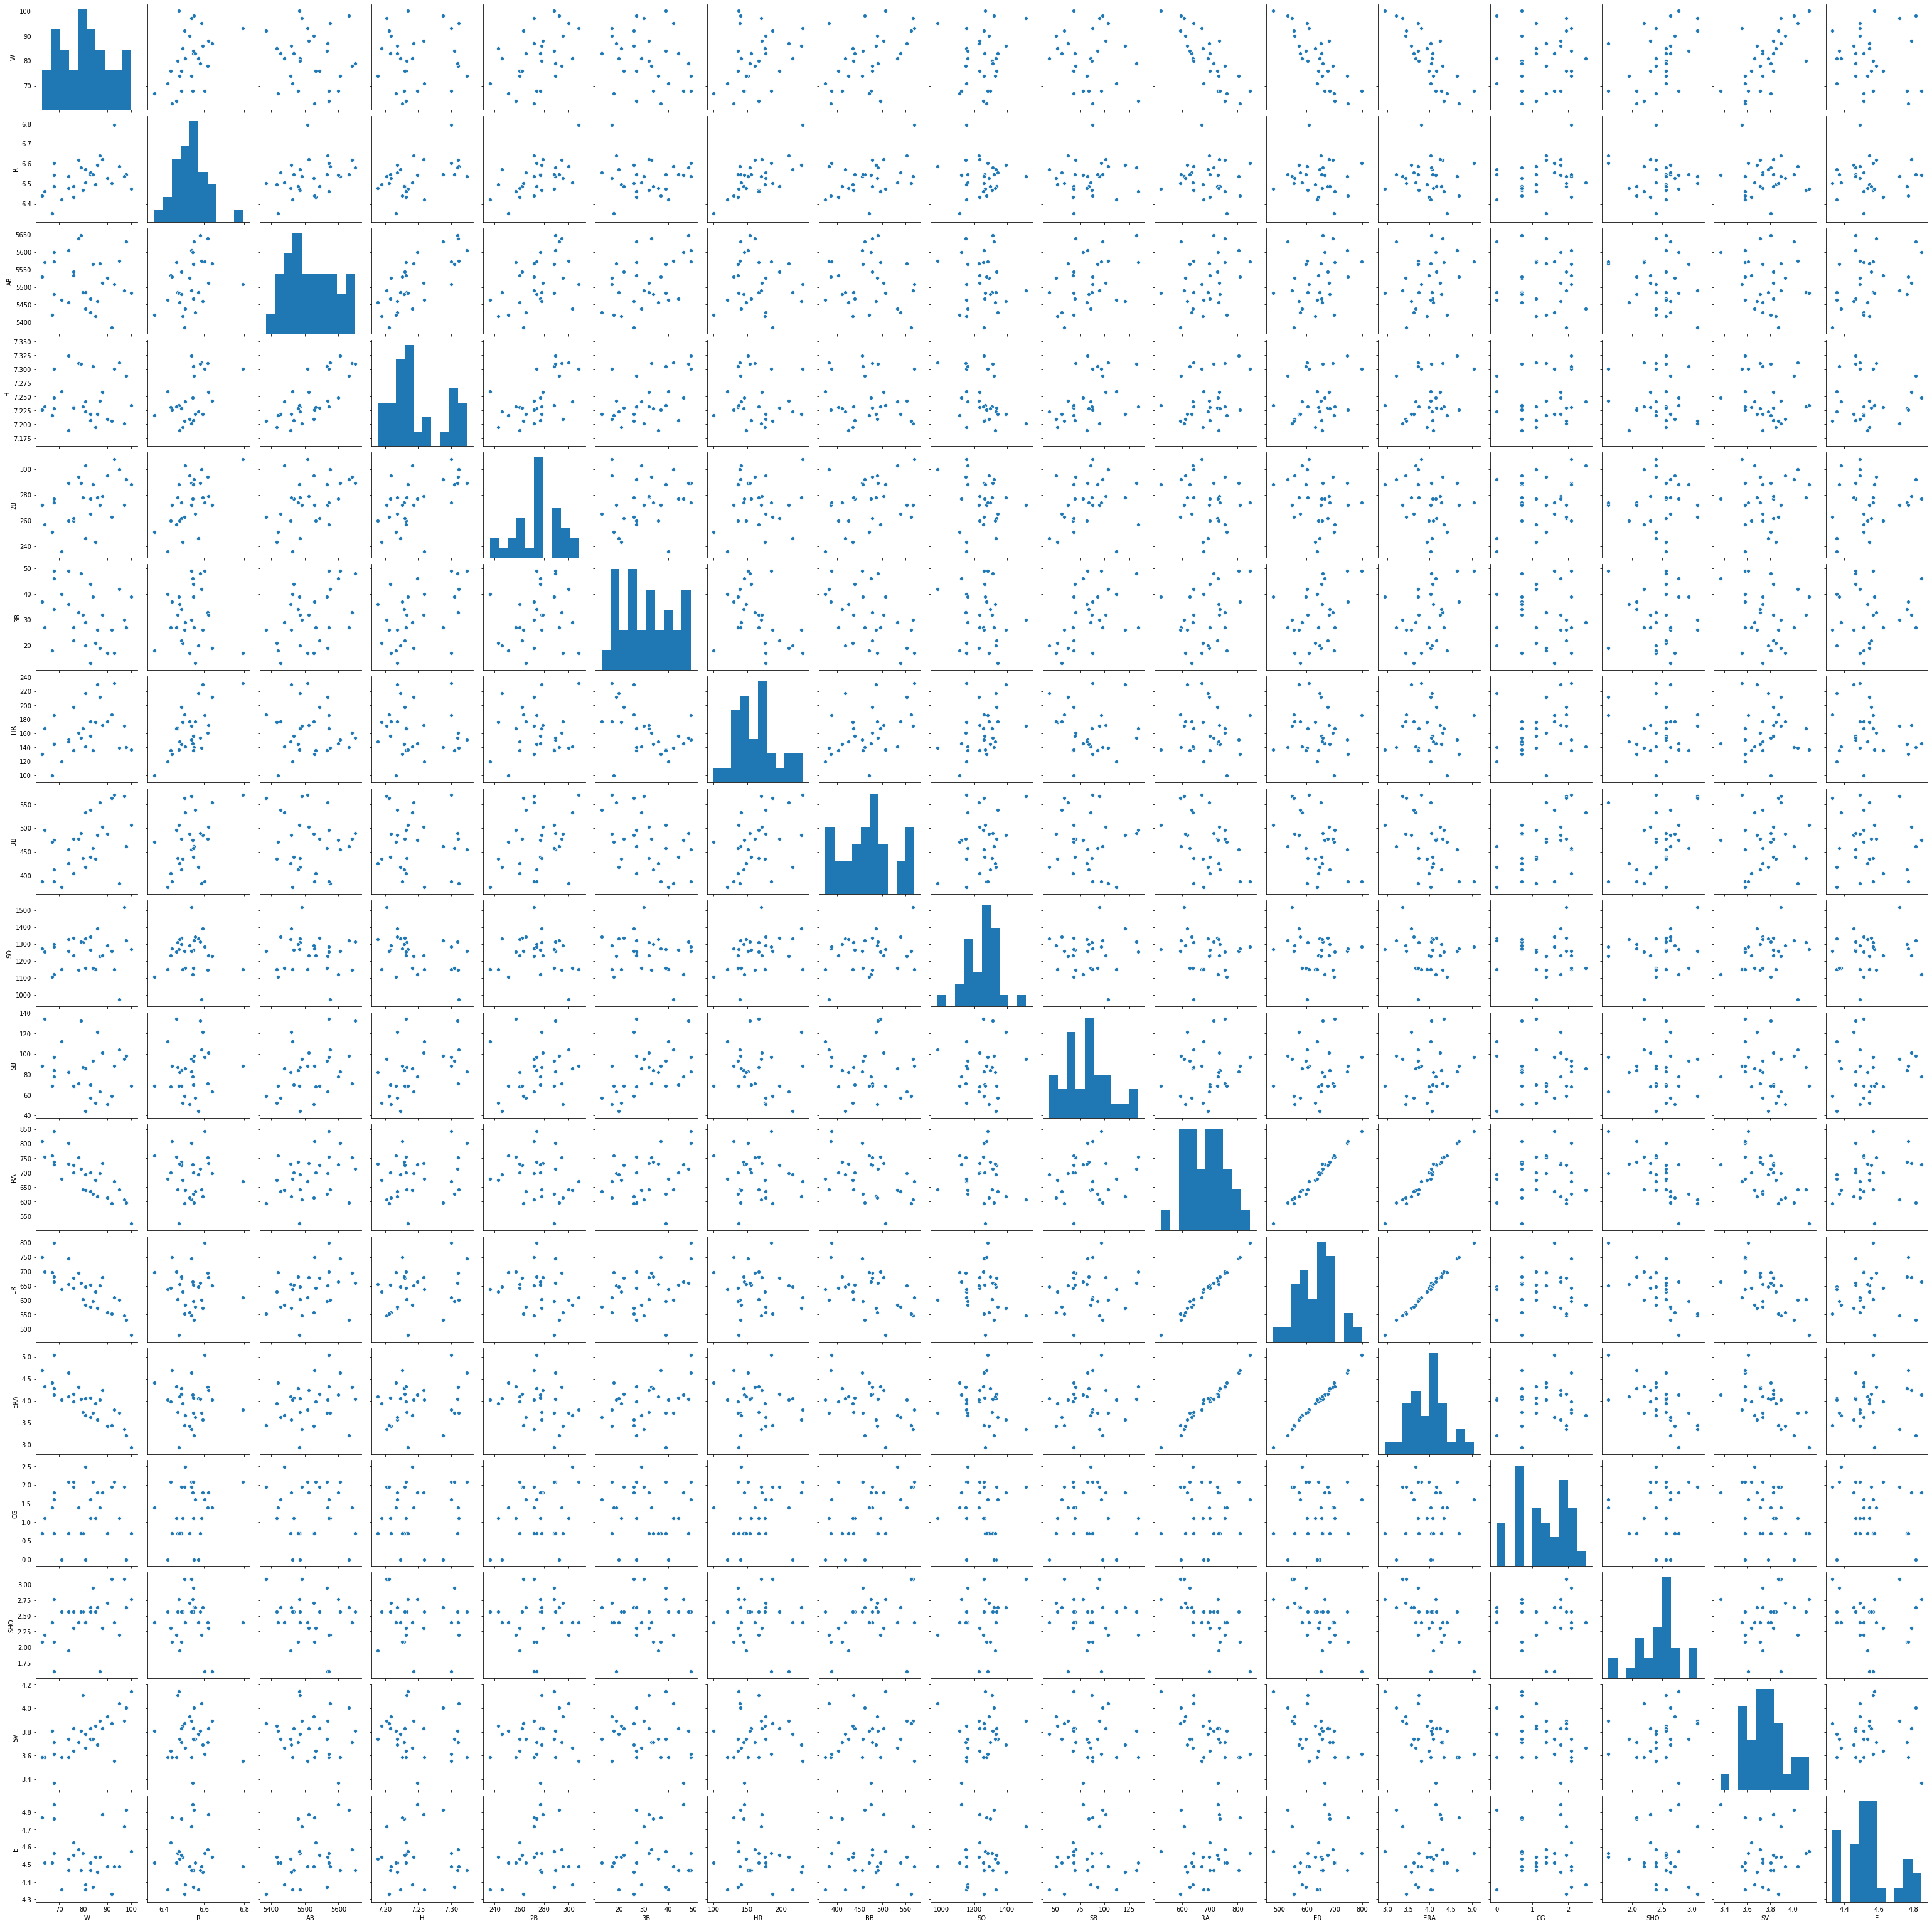

In [10]:
# checking the pair plot
sns.pairplot(baseball)

(array([2., 4., 3., 2., 5., 4., 3., 2., 2., 3.]),
 array([ 63. ,  66.7,  70.4,  74.1,  77.8,  81.5,  85.2,  88.9,  92.6,
         96.3, 100. ]),
 <a list of 10 Patch objects>)

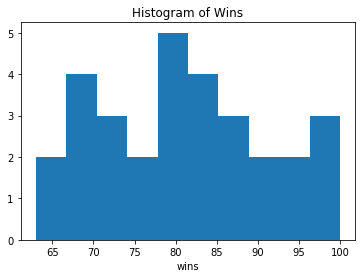

In [11]:
# lets check the visualization of the histogram of wins
plt.xlabel('wins')
plt.title('Histogram of Wins')
plt.hist(baseball['W'])

In [14]:
#lets checking the average number of wins of team
baseball['W'].describe()

#so here it represents that to qualify the match the team should win minimum 81 matches.So thus is the base line model.

count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
max      100.000000
Name: W, dtype: float64

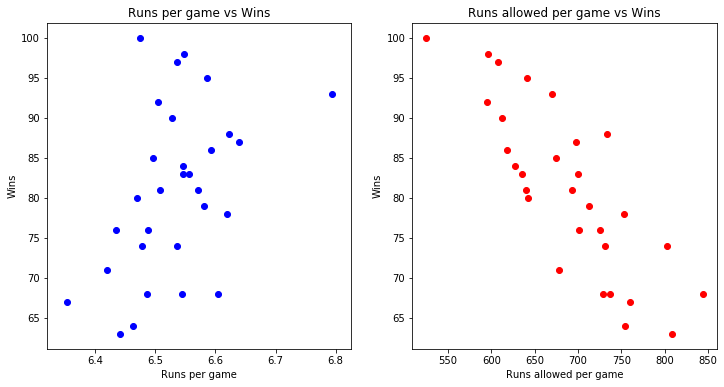

In [16]:
#lets checking the average of wins
#check how these two variables relate to our target 'W' column

fig = plt.figure(figsize=(12,6))

x1 = fig.add_subplot(1,2,1)
x2 = fig.add_subplot(1,2,2)

x1.set_title('Runs per game vs Wins')
x1.set_xlabel('Runs per game')
x1.set_ylabel('Wins')
x1.scatter(baseball['R'],baseball['W'],c='blue')


x2.set_title('Runs allowed per game vs Wins')
x2.set_xlabel('Runs allowed per game')
x2.set_ylabel('Wins')
x2.scatter(baseball['RA'],baseball['W'],c='red')

#so here it clearly indicates that if a team will hit more runs, then that team will win.

In [19]:
#checking the outliers and removing them if any
from scipy.stats import zscore
print(baseball.shape)
z_score=abs(zscore(baseball))
print('Z Score is:','\n',z_score)
baseball=baseball.loc[(z_score<3).all(axis=1)]
print(baseball.shape)

(30, 17)
Z Score is: 
 [[1.3654086  0.66532946 0.84773126 1.64938177 1.42017307 1.04119304
  0.7872986  1.53490242 2.69762957 0.91388329 0.66623393 0.50511008
  0.50695519 0.27892148 0.72910756 1.58127344 0.42706021]
 [0.1978383  0.17956168 0.71109353 0.98165584 0.12740339 1.23580856
  0.24396668 0.5365919  0.15487844 0.60182558 0.16597077 0.24892985
  0.25459752 0.27892148 0.32263825 0.336185   0.59169263]
 [0.00324325 0.30770406 1.1152333  0.13421019 1.58879521 0.22380785
  0.7233772  1.13914361 0.89398189 0.11144918 0.68033909 0.75162313
  0.64134684 1.76277761 0.15516048 0.62244106 1.19928939]
 [0.48324437 1.20472969 0.24152162 0.38913576 0.82812203 0.41842337
  0.8831807  1.16053598 0.16860185 0.69098493 0.18007593 0.10392217
  0.05301004 1.16561891 0.42776132 0.77328196 0.56049482]
 [0.67783942 0.05507026 1.28073815 1.95148012 0.80189192 1.72234737
  0.40377019 0.25136033 0.10586628 0.02228984 1.61880269 1.59750126
  1.53131824 1.16561891 0.32263825 1.08725291 0.59169263]
 [1.170

In [20]:
# separating the input and output/target variables
df_x=baseball.drop(columns=['W'])
y=baseball[['W']]

print(df_x.shape)
print(y.shape)

(29, 16)
(29, 1)


In [21]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [22]:
# Again checking the skewness of the dataset
x.skew()

R     -0.388428
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO   -0.598073
SV     0.109983
E      0.586101
dtype: float64

# 3-Building Different Model and Finding the Best Model

In [23]:
print(x.shape)
print(y.shape)

(29, 16)
(29, 1)


In [30]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso()
from sklearn.linear_model import Ridge
lrreg=Ridge()
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [31]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [32]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 73


R2 Score is: 0.845448797217739




************************ KNeighborsRegressor **********************


Final Random State is: 44


R2 Score is: 0.822533333333333




************************ Lasso **********************


Final Random State is: 82


R2 Score is: 0.9579431780402761




************************ Ridge **********************


Final Random State is: 75


R2 Score is: 0.9703817589630429




************************ GradientBoostingRegressor **********************


Final Random State is: 47


R2 Score is: 0.8110196384528787




************************ AdaBoostRegressor **********************


Final Random State is: 48


R2 Score is: 0.8506489378127754




************************ RandomForestRegressor **********************


Final Random State is: 46


R2 Score is: 0.8056298766560075






In [33]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            73  84.544880
1        KNeighborsRegressor            44  82.253333
2                      Lasso            82  95.794318
3                      Ridge            75  97.038176
4  GradientBoostingRegressor            47  81.101964
5          AdaBoostRegressor            48  85.064894
6      RandomForestRegressor            46  80.562988


In [34]:
# So here Ridge Regression is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
lrreg=Ridge()
parameters={'alpha':[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lrreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [50]:
# So lets build the final model with alpha=1 and random_state=75

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=75)
lrreg=Ridge(alpha=1)
lrreg.fit(x_train,y_train)
y_pred=lrreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.9703817589630429
RMSE is: 2.000643942478941


In [51]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of Ridge Regressor is:', cross_val_score(lrreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of Ridge Regressor is:',cross_val_score(lrreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of Ridge Regressor is: 0.4125806918724636
Standard Deviation of Ridge Regressor is: 0.6909424933207797


In [59]:
#lets predict the wins value
print('Actual Wins:\n',y_test)
print('Predicted Wins:\n',y_pred)

#So by looking this we can conclude that our model is predicting around 97% of correct results 
#for predicting the number of wins a baseball team will attain.


Actual Wins:
       W
1    83
22   71
3    76
6    87
19   64
15  100
Predicted Wins:
 [[81.72439208]
 [67.86397509]
 [72.85047872]
 [87.51709039]
 [64.91650306]
 [98.76436872]]


In [55]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lrreg,'lrreg_Wins.csv')

['lrreg_Wins.csv']

In [56]:
# load the model from the file
Wins_from_joblib=joblib.load('lrreg_Wins.csv')

In [57]:
#Use the loaded model to make predictions against test data
Wins_from_joblib.predict(x_test)

array([[81.72439208],
       [67.86397509],
       [72.85047872],
       [87.51709039],
       [64.91650306],
       [98.76436872]])

# Conclusion:
So here 'Ridge Regression Model' is the best model out of all model tested above and by looking this we can conclude that
our model is predicting around 97% of correct results for predicting the number of wins a baseball team will attain.